### Song Features Dataset - Regressing Popularity
- Dataset are the audio features calculated for each song
- Each song (row) has values for artist name, track name, track id and the audio features itself

#### Key Questions/Hypothesis that can be Answered
- Are Songs in major mode are more popular than ones in minor?
- Are Songs with High Loudness are most popular?
- Most people like listening to songs with shorter duration?

In [1]:
import pandas as pd

s_df = pd.read_csv('./datasets/SpotifySongPolularityAPIExtract.csv')
s_df

artist_name                track_id  \
0                          YG  2RM4jf1Xa9zPgMGRDiht8O   
1                          YG  1tHDG53xJNGsItRA3vfVgs   
2                       R3HAB  6Wosx2euFPMT14UXiWudMy   
3                  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4                  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   
...                       ...                     ...   
130658            Calum Scott  0cvfSKcm9VeduwyYPrxtLx   
130659           Saint Claire  43MP9F7UzvfilSrw2SqZGJ   
130660              Mike Stud  4TWlUuFk81NGUNKwndyS5Q   
130661               D Savage  5iGBXzOoRo4sBTy8wdzMyK   
130662  Banda Los Sebastianes  7LNtyuekYHiZ99UxkrfCQR   

                                            track_name  acousticness  \
0       Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820   
1                         BAND DRUM (feat. A$AP Rocky)      0.024400   
2                                        Radio Silence      0.025000   
3                                              Lactose      0.029400   
4                                  Same - Original mix      0.000035   
...                                                ...           ...   
130658                                  Come Back Home      0.006780   
130659                                  Enough for You      0.918000   
130660                                           Do It      0.330000   
130661                                        No Smoke      0.007900   
130662                                         En Vida      0.549000   

        danceability  duration_ms  energy  instrumentalness  key  liveness  \
0              0.743       238373   0.339             0.000    1    0.0812   
1              0.846       214800   0.557             0.000    8    0.2860   
2              0.603       138913   0.723             0.000    9    0.0824   
3              0.800       125381   0.579             0.912    5    0.0994   
4              0.783       124016   0.792             0.878    7    0.0332   
...              ...          ...     ...               ...  ...       ...   
130658         0.601       190539   0.801             0.000   11    0.0991   
130659         0.387       194583   0.249             0.000    9    0.1030   
130660         0.717       139191   0.532             0.000    8    0.0997   
130661         0.772       180013   0.510             0.000    4    0.1310   
130662         0.715       145827   0.734             0.000    3    0.1080   

        loudness  mode  speechiness    tempo  time_signature  valence  \
0         -7.678     1       0.4090  203.927               4   0.1180   
1         -7.259     1       0.4570  159.009               4   0.3710   
2         -5.890     0       0.0454  114.966               4   0.3820   
3        -12.118     0       0.0701  123.003               4   0.6410   
4        -10.277     1       0.0661  120.047               4   0.9280   
...          ...   ...          ...      ...             ...      ...   
130658    -5.174     1       0.0323  131.049               4   0.2890   
130659   -13.233     1       0.0437   94.039               4   0.3460   
130660    -8.351     0       0.2060  156.977               4   0.5460   
130661    -9.670     0       0.1200  120.049               4   0.0755   
130662    -3.244     1       0.0367  130.128               3   0.9760   

        popularity  
0               15  
1                0  
2               56  
3                0  
4                0  
...            ...  
130658          57  
130659          60  
130660          47  
130661          50  
130662          55  

[130663 rows x 17 columns]

In [2]:
s_df = s_df.drop(labels=['track_name', 'track_id'], axis=1)
s_df

artist_name  acousticness  danceability  duration_ms  \
0                          YG      0.005820         0.743       238373   
1                          YG      0.024400         0.846       214800   
2                       R3HAB      0.025000         0.603       138913   
3                  Chris Cooq      0.029400         0.800       125381   
4                  Chris Cooq      0.000035         0.783       124016   
...                       ...           ...           ...          ...   
130658            Calum Scott      0.006780         0.601       190539   
130659           Saint Claire      0.918000         0.387       194583   
130660              Mike Stud      0.330000         0.717       139191   
130661               D Savage      0.007900         0.772       180013   
130662  Banda Los Sebastianes      0.549000         0.715       145827   

        energy  instrumentalness  key  liveness  loudness  mode  speechiness  \
0        0.339             0.000    1    0.0812    -7.678     1       0.4090   
1        0.557             0.000    8    0.2860    -7.259     1       0.4570   
2        0.723             0.000    9    0.0824    -5.890     0       0.0454   
3        0.579             0.912    5    0.0994   -12.118     0       0.0701   
4        0.792             0.878    7    0.0332   -10.277     1       0.0661   
...        ...               ...  ...       ...       ...   ...          ...   
130658   0.801             0.000   11    0.0991    -5.174     1       0.0323   
130659   0.249             0.000    9    0.1030   -13.233     1       0.0437   
130660   0.532             0.000    8    0.0997    -8.351     0       0.2060   
130661   0.510             0.000    4    0.1310    -9.670     0       0.1200   
130662   0.734             0.000    3    0.1080    -3.244     1       0.0367   

          tempo  time_signature  valence  popularity  
0       203.927               4   0.1180          15  
1       159.009               4   0.3710           0  
2       114.966               4   0.3820          56  
3       123.003               4   0.6410           0  
4       120.047               4   0.9280           0  
...         ...             ...      ...         ...  
130658  131.049               4   0.2890          57  
130659   94.039               4   0.3460          60  
130660  156.977               4   0.5460          47  
130661  120.049               4   0.0755          50  
130662  130.128               3   0.9760          55  

[130663 rows x 15 columns]

In [3]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   acousticness      130663 non-null  float64
 2   danceability      130663 non-null  float64
 3   duration_ms       130663 non-null  int64  
 4   energy            130663 non-null  float64
 5   instrumentalness  130663 non-null  float64
 6   key               130663 non-null  int64  
 7   liveness          130663 non-null  float64
 8   loudness          130663 non-null  float64
 9   mode              130663 non-null  int64  
 10  speechiness       130663 non-null  float64
 11  tempo             130663 non-null  float64
 12  time_signature    130663 non-null  int64  
 13  valence           130663 non-null  float64
 14  popularity        130663 non-null  int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 15.0+ MB


In [4]:
s_df.artist_name.value_counts()

artist_name
Johann Sebastian Bach      3621
Wolfgang Amadeus Mozart    1755
Armin van Buuren           1124
Ludwig van Beethoven        928
Frédéric Chopin             614
                           ... 
Mozaics                       1
Vanja Radovanović             1
Hounds                        1
CHIZZY JAY                    1
Saint Claire                  1
Name: count, Length: 34621, dtype: int64

In [5]:
group_s_df=s_df[['artist_name', 'popularity']].groupby('artist_name').sum('popularity').reset_index()
group_s_df

artist_name  popularity
0                                        !!!         186
1      "Calendar Girls" Original London Cast          28
2                     "Elena Of Avalor" Cast          25
3                      "Puppy Dog Pals" Cast          91
4                        "Weird Al" Yankovic          48
...                                      ...         ...
34616                                    허니비           9
34617                                   홍단소녀          29
34618                                    훈남쓰          36
34619                            ＮＯＳＴＲＡＤＡＭＵＳ          29
34620                               ｊａｒｊａｒｊｒ          21

[34621 rows x 2 columns]

In [6]:
group_s_df.popularity.sort_values(ascending=False)

14783    32155
32817    18318
2217     16729
18660    10931
10769     8380
         ...  
7300         0
21419        0
16462        0
2617         0
22552        0
Name: popularity, Length: 34621, dtype: int64

In [7]:
group_s_df = group_s_df[~(group_s_df.popularity == 0)].reset_index(drop=True)

In [8]:
group_s_df

artist_name  popularity
0                                        !!!         186
1      "Calendar Girls" Original London Cast          28
2                     "Elena Of Avalor" Cast          25
3                      "Puppy Dog Pals" Cast          91
4                        "Weird Al" Yankovic          48
...                                      ...         ...
29798                                    허니비           9
29799                                   홍단소녀          29
29800                                    훈남쓰          36
29801                            ＮＯＳＴＲＡＤＡＭＵＳ          29
29802                               ｊａｒｊａｒｊｒ          21

[29803 rows x 2 columns]

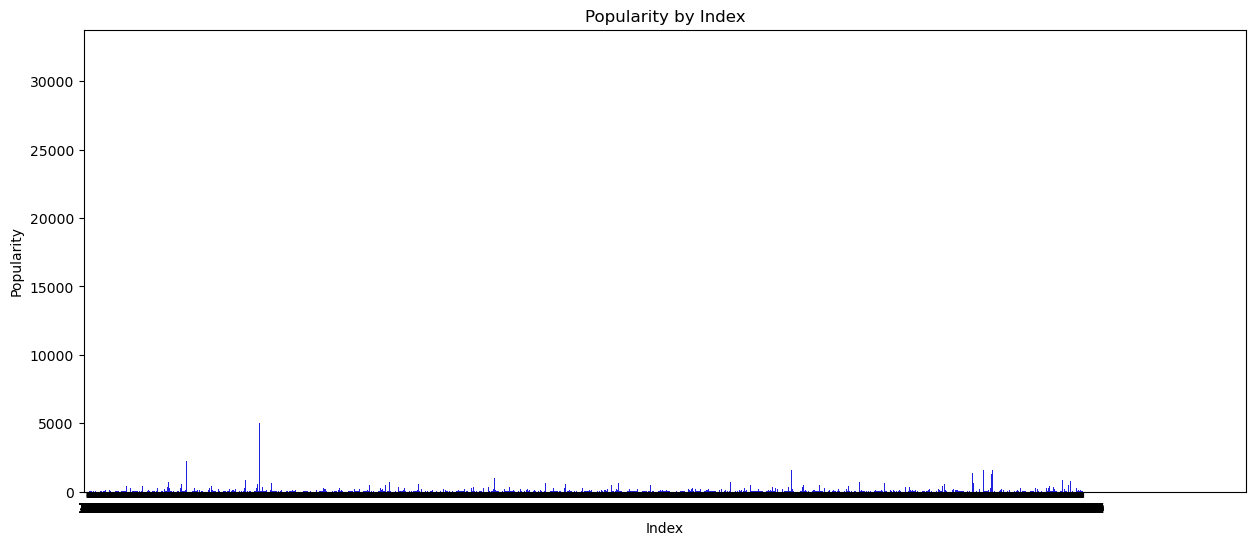

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(x= group_s_df.index, y='popularity', data=group_s_df, color='blue')
plt.title('Popularity by Index')
plt.xlabel('Index')
plt.ylabel('Popularity')
plt.xlim(-100, 34700)
plt.show()

In [10]:
s_df

artist_name  acousticness  danceability  duration_ms  \
0                          YG      0.005820         0.743       238373   
1                          YG      0.024400         0.846       214800   
2                       R3HAB      0.025000         0.603       138913   
3                  Chris Cooq      0.029400         0.800       125381   
4                  Chris Cooq      0.000035         0.783       124016   
...                       ...           ...           ...          ...   
130658            Calum Scott      0.006780         0.601       190539   
130659           Saint Claire      0.918000         0.387       194583   
130660              Mike Stud      0.330000         0.717       139191   
130661               D Savage      0.007900         0.772       180013   
130662  Banda Los Sebastianes      0.549000         0.715       145827   

        energy  instrumentalness  key  liveness  loudness  mode  speechiness  \
0        0.339             0.000    1    0.0812    -7.678     1       0.4090   
1        0.557             0.000    8    0.2860    -7.259     1       0.4570   
2        0.723             0.000    9    0.0824    -5.890     0       0.0454   
3        0.579             0.912    5    0.0994   -12.118     0       0.0701   
4        0.792             0.878    7    0.0332   -10.277     1       0.0661   
...        ...               ...  ...       ...       ...   ...          ...   
130658   0.801             0.000   11    0.0991    -5.174     1       0.0323   
130659   0.249             0.000    9    0.1030   -13.233     1       0.0437   
130660   0.532             0.000    8    0.0997    -8.351     0       0.2060   
130661   0.510             0.000    4    0.1310    -9.670     0       0.1200   
130662   0.734             0.000    3    0.1080    -3.244     1       0.0367   

          tempo  time_signature  valence  popularity  
0       203.927               4   0.1180          15  
1       159.009               4   0.3710           0  
2       114.966               4   0.3820          56  
3       123.003               4   0.6410           0  
4       120.047               4   0.9280           0  
...         ...             ...      ...         ...  
130658  131.049               4   0.2890          57  
130659   94.039               4   0.3460          60  
130660  156.977               4   0.5460          47  
130661  120.049               4   0.0755          50  
130662  130.128               3   0.9760          55  

[130663 rows x 15 columns]

In [11]:
pre_s_df = s_df.drop(labels=['artist_name'], axis=1)
pre_s_df

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.005820         0.743       238373   0.339             0.000   
1           0.024400         0.846       214800   0.557             0.000   
2           0.025000         0.603       138913   0.723             0.000   
3           0.029400         0.800       125381   0.579             0.912   
4           0.000035         0.783       124016   0.792             0.878   
...              ...           ...          ...     ...               ...   
130658      0.006780         0.601       190539   0.801             0.000   
130659      0.918000         0.387       194583   0.249             0.000   
130660      0.330000         0.717       139191   0.532             0.000   
130661      0.007900         0.772       180013   0.510             0.000   
130662      0.549000         0.715       145827   0.734             0.000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
0         1    0.0812    -7.678     1       0.4090  203.927               4   
1         8    0.2860    -7.259     1       0.4570  159.009               4   
2         9    0.0824    -5.890     0       0.0454  114.966               4   
3         5    0.0994   -12.118     0       0.0701  123.003               4   
4         7    0.0332   -10.277     1       0.0661  120.047               4   
...     ...       ...       ...   ...          ...      ...             ...   
130658   11    0.0991    -5.174     1       0.0323  131.049               4   
130659    9    0.1030   -13.233     1       0.0437   94.039               4   
130660    8    0.0997    -8.351     0       0.2060  156.977               4   
130661    4    0.1310    -9.670     0       0.1200  120.049               4   
130662    3    0.1080    -3.244     1       0.0367  130.128               3   

        valence  popularity  
0        0.1180          15  
1        0.3710           0  
2        0.3820          56  
3        0.6410           0  
4        0.9280           0  
...         ...         ...  
130658   0.2890          57  
130659   0.3460          60  
130660   0.5460          47  
130661   0.0755          50  
130662   0.9760          55  

[130663 rows x 14 columns]

In [12]:
pre_s_df.duplicated().sum()

693

In [13]:
pre_s_df = pre_s_df.drop_duplicates()
pre_s_df

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.005820         0.743       238373   0.339             0.000   
1           0.024400         0.846       214800   0.557             0.000   
2           0.025000         0.603       138913   0.723             0.000   
3           0.029400         0.800       125381   0.579             0.912   
4           0.000035         0.783       124016   0.792             0.878   
...              ...           ...          ...     ...               ...   
130658      0.006780         0.601       190539   0.801             0.000   
130659      0.918000         0.387       194583   0.249             0.000   
130660      0.330000         0.717       139191   0.532             0.000   
130661      0.007900         0.772       180013   0.510             0.000   
130662      0.549000         0.715       145827   0.734             0.000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
0         1    0.0812    -7.678     1       0.4090  203.927               4   
1         8    0.2860    -7.259     1       0.4570  159.009               4   
2         9    0.0824    -5.890     0       0.0454  114.966               4   
3         5    0.0994   -12.118     0       0.0701  123.003               4   
4         7    0.0332   -10.277     1       0.0661  120.047               4   
...     ...       ...       ...   ...          ...      ...             ...   
130658   11    0.0991    -5.174     1       0.0323  131.049               4   
130659    9    0.1030   -13.233     1       0.0437   94.039               4   
130660    8    0.0997    -8.351     0       0.2060  156.977               4   
130661    4    0.1310    -9.670     0       0.1200  120.049               4   
130662    3    0.1080    -3.244     1       0.0367  130.128               3   

        valence  popularity  
0        0.1180          15  
1        0.3710           0  
2        0.3820          56  
3        0.6410           0  
4        0.9280           0  
...         ...         ...  
130658   0.2890          57  
130659   0.3460          60  
130660   0.5460          47  
130661   0.0755          50  
130662   0.9760          55  

[129970 rows x 14 columns]

In [14]:
pre_s_df = pre_s_df.reset_index(drop=True)

array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'popularity'}>, <Axes: >, <Axes: >]],
      dtype=object)

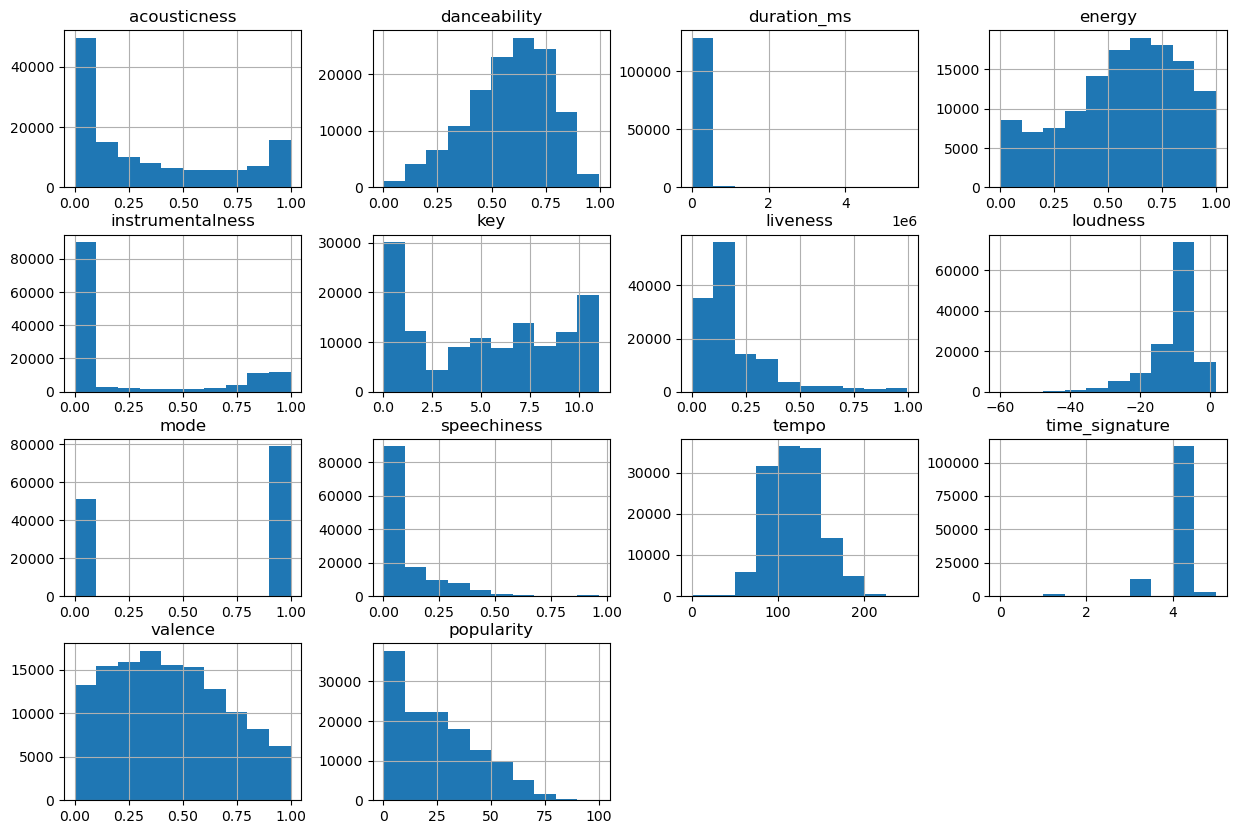

In [15]:
pre_s_df.hist(figsize=(15,10))

In [16]:
import numpy as np

In [17]:
pre_s_df['mode'].value_counts()

mode
1    78944
0    51026
Name: count, dtype: int64

In [18]:
pre_s_df.corr()['popularity'].sort_values(ascending=False)[1:]

loudness            0.243156
danceability        0.129257
energy              0.121808
time_signature      0.062879
tempo               0.035819
valence             0.013526
key                 0.003017
speechiness        -0.002136
duration_ms        -0.002249
mode               -0.007623
liveness           -0.029338
acousticness       -0.113821
instrumentalness   -0.216018
Name: popularity, dtype: float64

<Axes: >

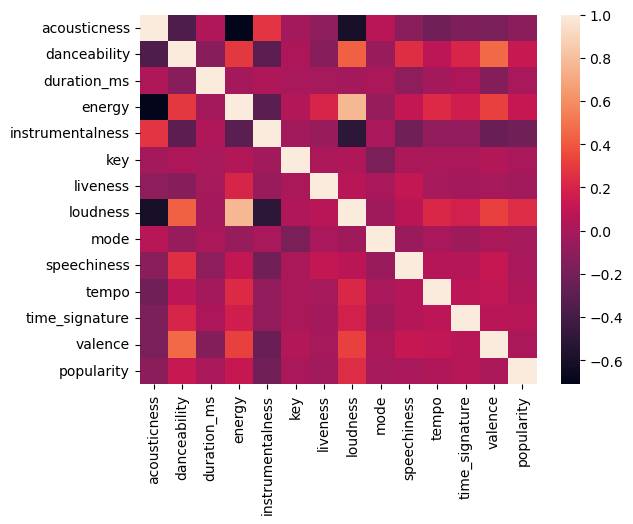

In [19]:
sns.heatmap(pre_s_df.corr())

In [20]:
from statsmodels.api import OLS

features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.628
Model:                            OLS   Adj. R-squared (uncentered):              0.628
Method:                 Least Squares   F-statistic:                          1.688e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:07:32   Log-Likelihood:                     -5.6719e+05
No. Observations:              129970   AIC:                                  1.134e+06
Df Residuals:                  129957   BIC:                                  1.135e+06
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [22]:
get_vif(features)

vif_score           feature
0    3.843289      acousticness
1   15.594098      danceability
2    4.017270       duration_ms
3   16.327319            energy
4    2.047211  instrumentalness
5    3.163900               key
6    2.643559          liveness
7    8.551992          loudness
8    2.593980              mode
9    2.081632       speechiness
10  15.980557             tempo
11  41.478663    time_signature
12   5.500248           valence

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

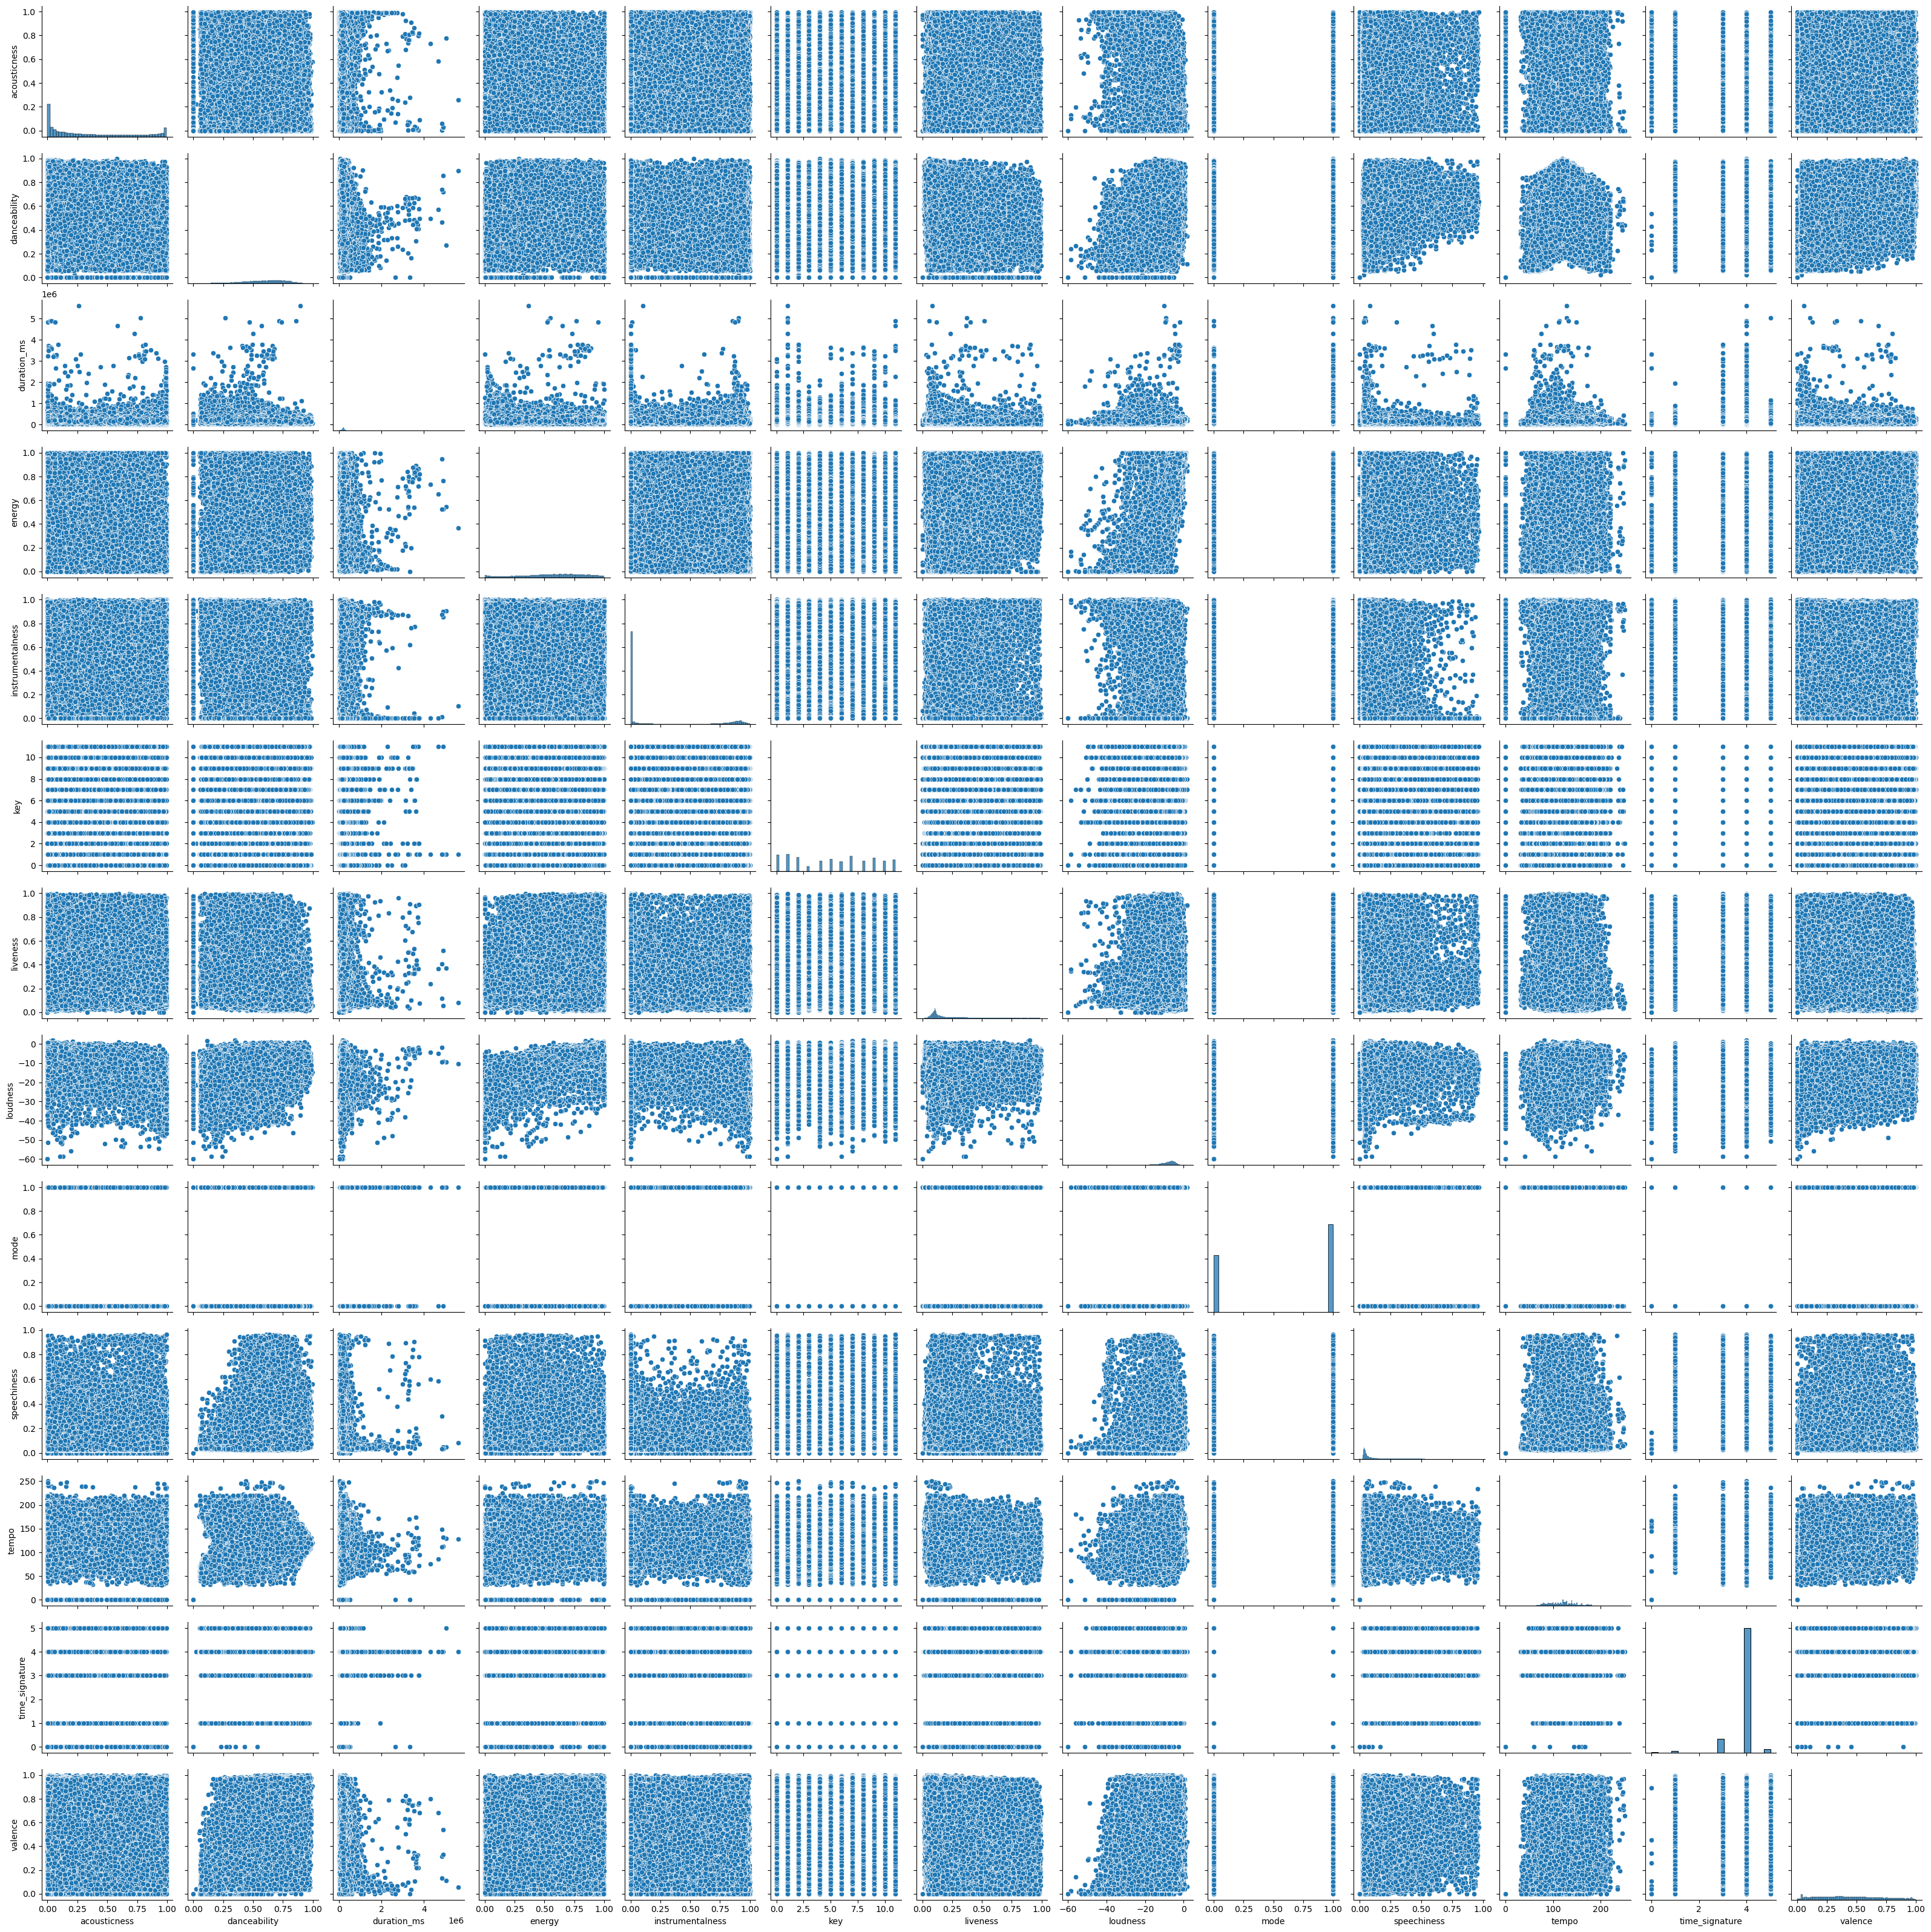

In [23]:
sns.pairplot(features)

데이터 전처리

In [24]:
pre_s_df

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.005820         0.743       238373   0.339             0.000   
1           0.024400         0.846       214800   0.557             0.000   
2           0.025000         0.603       138913   0.723             0.000   
3           0.029400         0.800       125381   0.579             0.912   
4           0.000035         0.783       124016   0.792             0.878   
...              ...           ...          ...     ...               ...   
129965      0.006780         0.601       190539   0.801             0.000   
129966      0.918000         0.387       194583   0.249             0.000   
129967      0.330000         0.717       139191   0.532             0.000   
129968      0.007900         0.772       180013   0.510             0.000   
129969      0.549000         0.715       145827   0.734             0.000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
0         1    0.0812    -7.678     1       0.4090  203.927               4   
1         8    0.2860    -7.259     1       0.4570  159.009               4   
2         9    0.0824    -5.890     0       0.0454  114.966               4   
3         5    0.0994   -12.118     0       0.0701  123.003               4   
4         7    0.0332   -10.277     1       0.0661  120.047               4   
...     ...       ...       ...   ...          ...      ...             ...   
129965   11    0.0991    -5.174     1       0.0323  131.049               4   
129966    9    0.1030   -13.233     1       0.0437   94.039               4   
129967    8    0.0997    -8.351     0       0.2060  156.977               4   
129968    4    0.1310    -9.670     0       0.1200  120.049               4   
129969    3    0.1080    -3.244     1       0.0367  130.128               3   

        valence  popularity  
0        0.1180          15  
1        0.3710           0  
2        0.3820          56  
3        0.6410           0  
4        0.9280           0  
...         ...         ...  
129965   0.2890          57  
129966   0.3460          60  
129967   0.5460          47  
129968   0.0755          50  
129969   0.9760          55  

[129970 rows x 14 columns]

<Axes: >

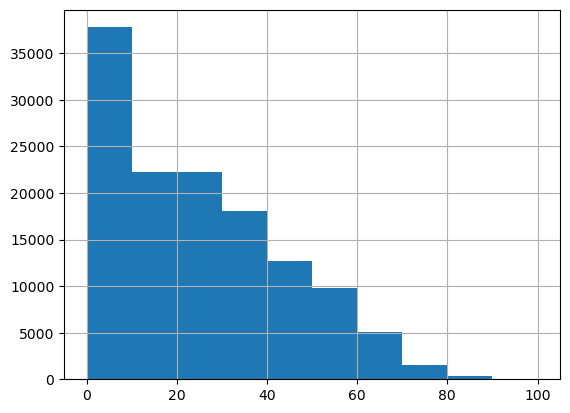

In [25]:
pre_s_df.popularity.hist()

<Axes: >

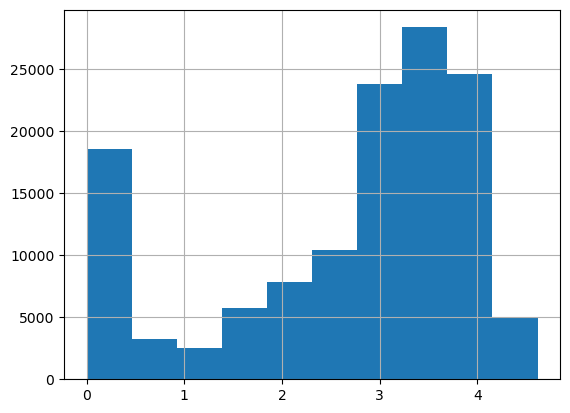

In [26]:
np.log1p(pre_s_df.popularity).hist()

In [27]:
from sklearn.preprocessing import PowerTransformer
ptf = PowerTransformer(standardize=False)
pre_s_df['Target_yeo'] = ptf.fit_transform(pre_s_df[['popularity']])
pre_s_df

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.005820         0.743       238373   0.339             0.000   
1           0.024400         0.846       214800   0.557             0.000   
2           0.025000         0.603       138913   0.723             0.000   
3           0.029400         0.800       125381   0.579             0.912   
4           0.000035         0.783       124016   0.792             0.878   
...              ...           ...          ...     ...               ...   
129965      0.006780         0.601       190539   0.801             0.000   
129966      0.918000         0.387       194583   0.249             0.000   
129967      0.330000         0.717       139191   0.532             0.000   
129968      0.007900         0.772       180013   0.510             0.000   
129969      0.549000         0.715       145827   0.734             0.000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
0         1    0.0812    -7.678     1       0.4090  203.927               4   
1         8    0.2860    -7.259     1       0.4570  159.009               4   
2         9    0.0824    -5.890     0       0.0454  114.966               4   
3         5    0.0994   -12.118     0       0.0701  123.003               4   
4         7    0.0332   -10.277     1       0.0661  120.047               4   
...     ...       ...       ...   ...          ...      ...             ...   
129965   11    0.0991    -5.174     1       0.0323  131.049               4   
129966    9    0.1030   -13.233     1       0.0437   94.039               4   
129967    8    0.0997    -8.351     0       0.2060  156.977               4   
129968    4    0.1310    -9.670     0       0.1200  120.049               4   
129969    3    0.1080    -3.244     1       0.0367  130.128               3   

        valence  popularity  Target_yeo  
0        0.1180          15    5.495101  
1        0.3710           0    0.000000  
2        0.3820          56   11.416552  
3        0.6410           0    0.000000  
4        0.9280           0    0.000000  
...         ...         ...         ...  
129965   0.2890          57   11.523255  
129966   0.3460          60   11.837403  
129967   0.5460          47   10.405686  
129968   0.0755          50   10.753451  
129969   0.9760          55   11.308809  

[129970 rows x 15 columns]

<Axes: >

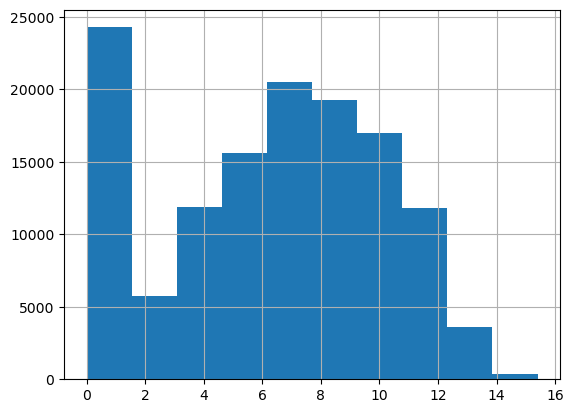

In [28]:
pre_s_df.Target_yeo.hist()

In [41]:
sample0 = pre_s_df[pre_s_df.Target_yeo < 1.5].sample(2000, random_state=124)
sample = pre_s_df[pre_s_df.Target_yeo >= 1.5]

pre_s_df1 = pd.concat([sample0, sample], axis=0)
pre_s_df1

acousticness  danceability  duration_ms  energy  instrumentalness  \
71741       0.086100         0.325       191176   0.815          0.000000   
35009       0.068700         0.832       270947   0.804          0.000026   
58166       0.458000         0.838       205978   0.353          0.886000   
23462       0.364000         0.607       243890   0.560          0.000100   
34327       0.000244         0.691       105169   0.557          0.000000   
...              ...           ...          ...     ...               ...   
129965      0.006780         0.601       190539   0.801          0.000000   
129966      0.918000         0.387       194583   0.249          0.000000   
129967      0.330000         0.717       139191   0.532          0.000000   
129968      0.007900         0.772       180013   0.510          0.000000   
129969      0.549000         0.715       145827   0.734          0.000000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
71741     5    0.3750    -5.947     0       0.7310  203.320               4   
35009    10    0.0489    -6.485     0       0.0435  136.027               4   
58166    11    0.1060   -11.026     1       0.1210  100.979               4   
23462     4    0.1380    -7.603     1       0.0327  125.103               4   
34327     3    0.2270    -7.958     0       0.1010   97.769               3   
...     ...       ...       ...   ...          ...      ...             ...   
129965   11    0.0991    -5.174     1       0.0323  131.049               4   
129966    9    0.1030   -13.233     1       0.0437   94.039               4   
129967    8    0.0997    -8.351     0       0.2060  156.977               4   
129968    4    0.1310    -9.670     0       0.1200  120.049               4   
129969    3    0.1080    -3.244     1       0.0367  130.128               3   

        valence  popularity  Target_yeo  
71741    0.3580           0    0.000000  
35009    0.7270           0    0.000000  
58166    0.5280           0    0.000000  
23462    0.4850           0    0.000000  
34327    0.6510           0    0.000000  
...         ...         ...         ...  
129965   0.2890          57   11.523255  
129966   0.3460          60   11.837403  
129967   0.5460          47   10.405686  
129968   0.0755          50   10.753451  
129969   0.9760          55   11.308809  

[107695 rows x 15 columns]

In [42]:
pre_s_df1 = pre_s_df1.reset_index(drop=True)
pre_s_df1

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.086100         0.325       191176   0.815          0.000000   
1           0.068700         0.832       270947   0.804          0.000026   
2           0.458000         0.838       205978   0.353          0.886000   
3           0.364000         0.607       243890   0.560          0.000100   
4           0.000244         0.691       105169   0.557          0.000000   
...              ...           ...          ...     ...               ...   
107690      0.006780         0.601       190539   0.801          0.000000   
107691      0.918000         0.387       194583   0.249          0.000000   
107692      0.330000         0.717       139191   0.532          0.000000   
107693      0.007900         0.772       180013   0.510          0.000000   
107694      0.549000         0.715       145827   0.734          0.000000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
0         5    0.3750    -5.947     0       0.7310  203.320               4   
1        10    0.0489    -6.485     0       0.0435  136.027               4   
2        11    0.1060   -11.026     1       0.1210  100.979               4   
3         4    0.1380    -7.603     1       0.0327  125.103               4   
4         3    0.2270    -7.958     0       0.1010   97.769               3   
...     ...       ...       ...   ...          ...      ...             ...   
107690   11    0.0991    -5.174     1       0.0323  131.049               4   
107691    9    0.1030   -13.233     1       0.0437   94.039               4   
107692    8    0.0997    -8.351     0       0.2060  156.977               4   
107693    4    0.1310    -9.670     0       0.1200  120.049               4   
107694    3    0.1080    -3.244     1       0.0367  130.128               3   

        valence  popularity  Target_yeo  
0        0.3580           0    0.000000  
1        0.7270           0    0.000000  
2        0.5280           0    0.000000  
3        0.4850           0    0.000000  
4        0.6510           0    0.000000  
...         ...         ...         ...  
107690   0.2890          57   11.523255  
107691   0.3460          60   11.837403  
107692   0.5460          47   10.405686  
107693   0.0755          50   10.753451  
107694   0.9760          55   11.308809  

[107695 rows x 15 columns]

array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'Target_yeo'}>, <Axes: >]], dtype=object)

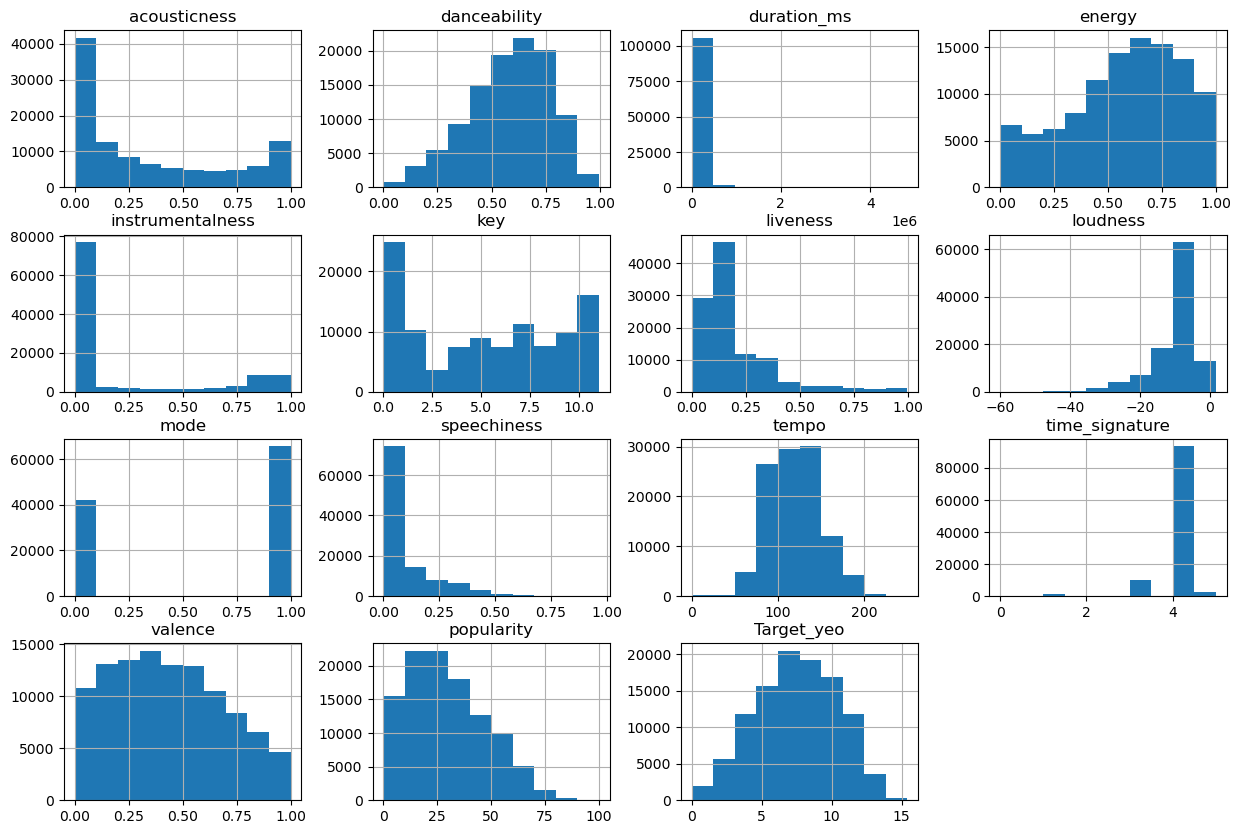

In [44]:
pre_s_df1.hist(figsize=(15,10))

In [45]:
pre_s_df1 = pre_s_df1.drop(labels=['popularity'], axis=1)
pre_s_df1

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.086100         0.325       191176   0.815          0.000000   
1           0.068700         0.832       270947   0.804          0.000026   
2           0.458000         0.838       205978   0.353          0.886000   
3           0.364000         0.607       243890   0.560          0.000100   
4           0.000244         0.691       105169   0.557          0.000000   
...              ...           ...          ...     ...               ...   
107690      0.006780         0.601       190539   0.801          0.000000   
107691      0.918000         0.387       194583   0.249          0.000000   
107692      0.330000         0.717       139191   0.532          0.000000   
107693      0.007900         0.772       180013   0.510          0.000000   
107694      0.549000         0.715       145827   0.734          0.000000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
0         5    0.3750    -5.947     0       0.7310  203.320               4   
1        10    0.0489    -6.485     0       0.0435  136.027               4   
2        11    0.1060   -11.026     1       0.1210  100.979               4   
3         4    0.1380    -7.603     1       0.0327  125.103               4   
4         3    0.2270    -7.958     0       0.1010   97.769               3   
...     ...       ...       ...   ...          ...      ...             ...   
107690   11    0.0991    -5.174     1       0.0323  131.049               4   
107691    9    0.1030   -13.233     1       0.0437   94.039               4   
107692    8    0.0997    -8.351     0       0.2060  156.977               4   
107693    4    0.1310    -9.670     0       0.1200  120.049               4   
107694    3    0.1080    -3.244     1       0.0367  130.128               3   

        valence  Target_yeo  
0        0.3580    0.000000  
1        0.7270    0.000000  
2        0.5280    0.000000  
3        0.4850    0.000000  
4        0.6510    0.000000  
...         ...         ...  
107690   0.2890   11.523255  
107691   0.3460   11.837403  
107692   0.5460   10.405686  
107693   0.0755   10.753451  
107694   0.9760   11.308809  

[107695 rows x 14 columns]

In [46]:
features, targets = pre_s_df1.iloc[:, :-1], pre_s_df1.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                          5.605e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:17:51   Log-Likelihood:                     -2.6716e+05
No. Observations:              107695   AIC:                                  5.343e+05
Df Residuals:                  107682   BIC:                                  5.345e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [47]:
get_vif(features)

vif_score           feature
0    4.075797      acousticness
1   15.760240      danceability
2    4.395278       duration_ms
3   17.694224            energy
4    2.060250  instrumentalness
5    3.159260               key
6    2.631478          liveness
7    8.913552          loudness
8    2.612719              mode
9    2.083100       speechiness
10  15.998794             tempo
11  44.293450    time_signature
12   5.593947           valence

- Cycle 1 훈련 진행

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [58]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation1(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    #MSLE = mean_squared_log_error(y_test, prediction)
    #RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

LinearRegression 이용

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_s_df1.iloc[:, :-1], pre_s_df1.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)

LinearRegression()

In [50]:
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

MSE: 7.9179, RMSE: 2.8139, MSLE: 0.1965, RMSLE: 0.4433, R2: 0.0867


In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [67]:
prediction = l_r.predict(X_test)
get_evaluation1(y_test.values, prediction)

MSE: 7.7398, RMSE: 2.7820, R2: 0.1072


degree가 6이상으로 올라가면 memory문제로 훈련이 진행이 안되고, 4 5 에서는 r2값이 음수값이 나옴

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_s_df1.iloc[:, :-1], pre_s_df1.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 14.9033, RMSE: 3.8605, MSLE: 0.3654, RMSLE: 0.6045, R2: -0.7191
RandomForestRegressor
MSE: 7.3575, RMSE: 2.7125, MSLE: 0.1832, RMSLE: 0.4280, R2: 0.1513
GradientBoostingRegressor
MSE: 7.5073, RMSE: 2.7400, MSLE: 0.1880, RMSLE: 0.4336, R2: 0.1340
XGBRegressor
MSE: 7.4934, RMSE: 2.7374, MSLE: 0.1856, RMSLE: 0.4308, R2: 0.1356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2567
[LightGBM] [Info] Number of data points in the train set: 86156, number of used features: 13
[LightGBM] [Info] Start training from score 7.500467
LGBMRegressor
MSE: 7.3846, RMSE: 2.7175, MSLE: 0.1851, RMSLE: 0.4302, R2: 0.1482


진행 순서
- 1. 위 훈련된 수치 확인
  2. 원본 데이터로 다시 훈련 (grid 빼고)
  3. 전처리(표준분포에 맞춰서) 및 이상치 제거 => 확인할 때 OLS랑 VIF 및 Corr 로 확인하기
  4. feature engineering 적용해서도 확
  5. 원하는 수치가 나올때까지 반복.

In [70]:
s_df

artist_name  acousticness  danceability  duration_ms  \
0                          YG      0.005820         0.743       238373   
1                          YG      0.024400         0.846       214800   
2                       R3HAB      0.025000         0.603       138913   
3                  Chris Cooq      0.029400         0.800       125381   
4                  Chris Cooq      0.000035         0.783       124016   
...                       ...           ...           ...          ...   
130658            Calum Scott      0.006780         0.601       190539   
130659           Saint Claire      0.918000         0.387       194583   
130660              Mike Stud      0.330000         0.717       139191   
130661               D Savage      0.007900         0.772       180013   
130662  Banda Los Sebastianes      0.549000         0.715       145827   

        energy  instrumentalness  key  liveness  loudness  mode  speechiness  \
0        0.339             0.000    1    0.0812    -7.678     1       0.4090   
1        0.557             0.000    8    0.2860    -7.259     1       0.4570   
2        0.723             0.000    9    0.0824    -5.890     0       0.0454   
3        0.579             0.912    5    0.0994   -12.118     0       0.0701   
4        0.792             0.878    7    0.0332   -10.277     1       0.0661   
...        ...               ...  ...       ...       ...   ...          ...   
130658   0.801             0.000   11    0.0991    -5.174     1       0.0323   
130659   0.249             0.000    9    0.1030   -13.233     1       0.0437   
130660   0.532             0.000    8    0.0997    -8.351     0       0.2060   
130661   0.510             0.000    4    0.1310    -9.670     0       0.1200   
130662   0.734             0.000    3    0.1080    -3.244     1       0.0367   

          tempo  time_signature  valence  popularity  
0       203.927               4   0.1180          15  
1       159.009               4   0.3710           0  
2       114.966               4   0.3820          56  
3       123.003               4   0.6410           0  
4       120.047               4   0.9280           0  
...         ...             ...      ...         ...  
130658  131.049               4   0.2890          57  
130659   94.039               4   0.3460          60  
130660  156.977               4   0.5460          47  
130661  120.049               4   0.0755          50  
130662  130.128               3   0.9760          55  

[130663 rows x 15 columns]

In [71]:
pre_s_df = s_df.drop(labels=['artist_name'], axis=1)
pre_s_df

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.005820         0.743       238373   0.339             0.000   
1           0.024400         0.846       214800   0.557             0.000   
2           0.025000         0.603       138913   0.723             0.000   
3           0.029400         0.800       125381   0.579             0.912   
4           0.000035         0.783       124016   0.792             0.878   
...              ...           ...          ...     ...               ...   
130658      0.006780         0.601       190539   0.801             0.000   
130659      0.918000         0.387       194583   0.249             0.000   
130660      0.330000         0.717       139191   0.532             0.000   
130661      0.007900         0.772       180013   0.510             0.000   
130662      0.549000         0.715       145827   0.734             0.000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
0         1    0.0812    -7.678     1       0.4090  203.927               4   
1         8    0.2860    -7.259     1       0.4570  159.009               4   
2         9    0.0824    -5.890     0       0.0454  114.966               4   
3         5    0.0994   -12.118     0       0.0701  123.003               4   
4         7    0.0332   -10.277     1       0.0661  120.047               4   
...     ...       ...       ...   ...          ...      ...             ...   
130658   11    0.0991    -5.174     1       0.0323  131.049               4   
130659    9    0.1030   -13.233     1       0.0437   94.039               4   
130660    8    0.0997    -8.351     0       0.2060  156.977               4   
130661    4    0.1310    -9.670     0       0.1200  120.049               4   
130662    3    0.1080    -3.244     1       0.0367  130.128               3   

        valence  popularity  
0        0.1180          15  
1        0.3710           0  
2        0.3820          56  
3        0.6410           0  
4        0.9280           0  
...         ...         ...  
130658   0.2890          57  
130659   0.3460          60  
130660   0.5460          47  
130661   0.0755          50  
130662   0.9760          55  

[130663 rows x 14 columns]

array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'popularity'}>, <Axes: >, <Axes: >]],
      dtype=object)

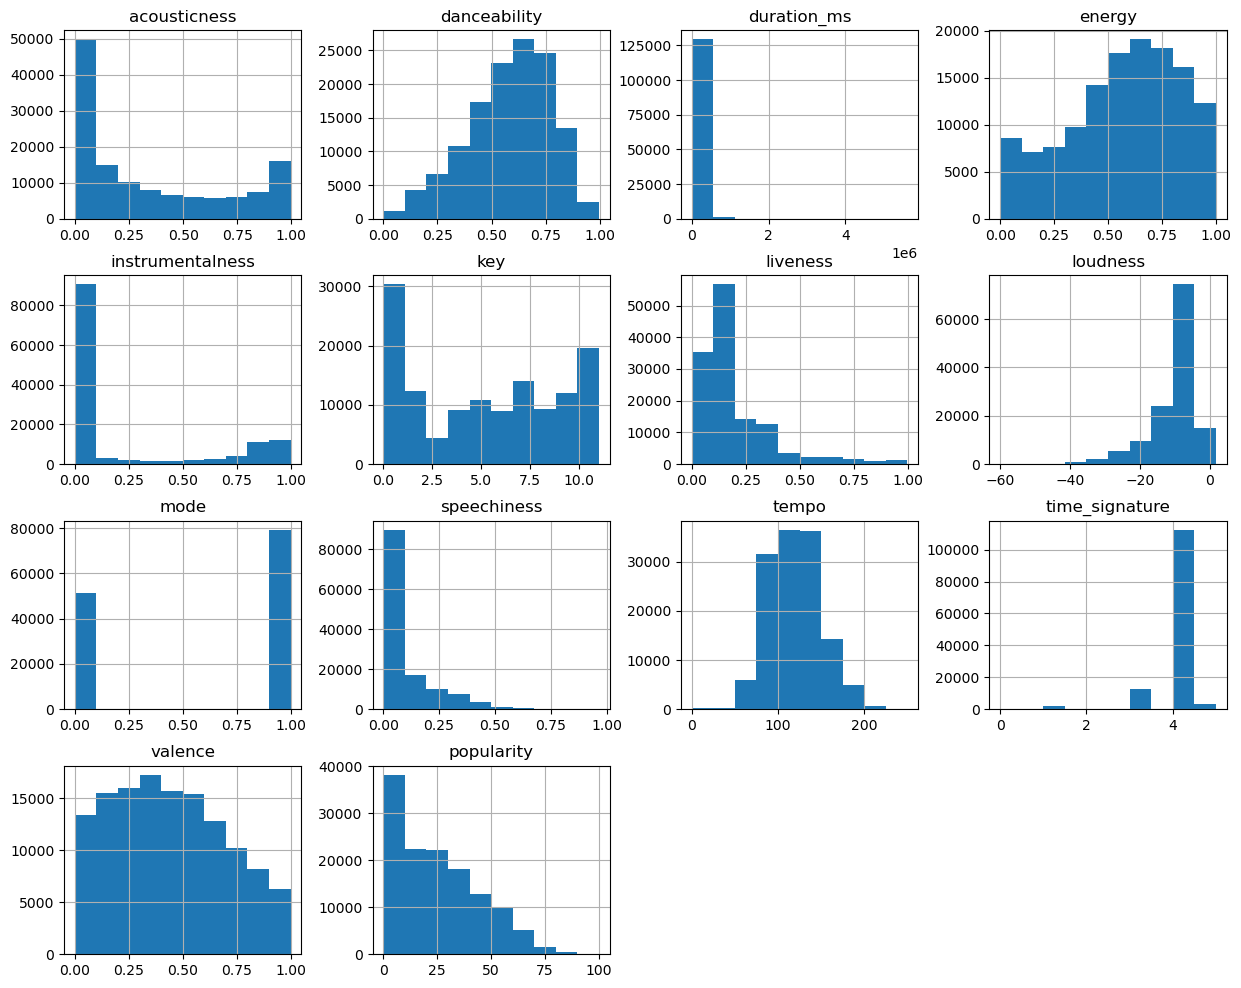

In [72]:
pre_s_df.hist(figsize=(15,12))

In [73]:
from statsmodels.api import OLS

features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.627
Method:                 Least Squares   F-statistic:                          1.690e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:03:57   Log-Likelihood:                     -5.7058e+05
No. Observations:              130663   AIC:                                  1.141e+06
Df Residuals:                  130650   BIC:                                  1.141e+06
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [74]:
get_vif(features)

vif_score           feature
0    3.835770      acousticness
1   15.588020      danceability
2    4.018739       duration_ms
3   16.194444            energy
4    2.048302  instrumentalness
5    3.164586               key
6    2.646151          liveness
7    8.488658          loudness
8    2.596074              mode
9    2.080770       speechiness
10  15.961667             tempo
11  41.254176    time_signature
12   5.492609           valence

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)

LinearRegression()

In [77]:
prediction = l_r.predict(X_test.values)
get_evaluation1(y_test.values, prediction)

MSE: 358.0183, RMSE: 18.9214, R2: 0.0810


In [78]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [80]:
prediction = l_r.predict(X_test)
get_evaluation1(y_test.values, prediction)

MSE: 342.0944, RMSE: 18.4958, R2: 0.1219


In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 648.0339, RMSE: 25.4565, MSLE: 3.0146, RMSLE: 1.7363, R2: -0.6634
RandomForestRegressor
MSE: 321.1287, RMSE: 17.9201, MSLE: 1.8148, RMSLE: 1.3471, R2: 0.1757
GradientBoostingRegressor


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

### Cycle 2 
- 타겟 데이터를 PowerTransform을 이용해서 표준분포에 가깝게 변환후 fit

In [84]:
from sklearn.preprocessing import PowerTransformer
ptf = PowerTransformer(standardize=False)
pre_s_df['Target_yeo'] = ptf.fit_transform(pre_s_df[['popularity']])
pre_s_df

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.005820         0.743       238373   0.339             0.000   
1           0.024400         0.846       214800   0.557             0.000   
2           0.025000         0.603       138913   0.723             0.000   
3           0.029400         0.800       125381   0.579             0.912   
4           0.000035         0.783       124016   0.792             0.878   
...              ...           ...          ...     ...               ...   
130658      0.006780         0.601       190539   0.801             0.000   
130659      0.918000         0.387       194583   0.249             0.000   
130660      0.330000         0.717       139191   0.532             0.000   
130661      0.007900         0.772       180013   0.510             0.000   
130662      0.549000         0.715       145827   0.734             0.000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
0         1    0.0812    -7.678     1       0.4090  203.927               4   
1         8    0.2860    -7.259     1       0.4570  159.009               4   
2         9    0.0824    -5.890     0       0.0454  114.966               4   
3         5    0.0994   -12.118     0       0.0701  123.003               4   
4         7    0.0332   -10.277     1       0.0661  120.047               4   
...     ...       ...       ...   ...          ...      ...             ...   
130658   11    0.0991    -5.174     1       0.0323  131.049               4   
130659    9    0.1030   -13.233     1       0.0437   94.039               4   
130660    8    0.0997    -8.351     0       0.2060  156.977               4   
130661    4    0.1310    -9.670     0       0.1200  120.049               4   
130662    3    0.1080    -3.244     1       0.0367  130.128               3   

        valence  popularity  Target_yeo  
0        0.1180          15    5.475097  
1        0.3710           0    0.000000  
2        0.3820          56   11.351753  
3        0.6410           0    0.000000  
4        0.9280           0    0.000000  
...         ...         ...         ...  
130658   0.2890          57   11.457514  
130659   0.3460          60   11.768863  
130660   0.5460          47   10.349612  
130661   0.0755          50   10.694418  
130662   0.9760          55   11.244958  

[130663 rows x 15 columns]

In [86]:
pre_s_df = pre_s_df.drop(labels=['popularity'], axis=1)
pre_s_df

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.005820         0.743       238373   0.339             0.000   
1           0.024400         0.846       214800   0.557             0.000   
2           0.025000         0.603       138913   0.723             0.000   
3           0.029400         0.800       125381   0.579             0.912   
4           0.000035         0.783       124016   0.792             0.878   
...              ...           ...          ...     ...               ...   
130658      0.006780         0.601       190539   0.801             0.000   
130659      0.918000         0.387       194583   0.249             0.000   
130660      0.330000         0.717       139191   0.532             0.000   
130661      0.007900         0.772       180013   0.510             0.000   
130662      0.549000         0.715       145827   0.734             0.000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
0         1    0.0812    -7.678     1       0.4090  203.927               4   
1         8    0.2860    -7.259     1       0.4570  159.009               4   
2         9    0.0824    -5.890     0       0.0454  114.966               4   
3         5    0.0994   -12.118     0       0.0701  123.003               4   
4         7    0.0332   -10.277     1       0.0661  120.047               4   
...     ...       ...       ...   ...          ...      ...             ...   
130658   11    0.0991    -5.174     1       0.0323  131.049               4   
130659    9    0.1030   -13.233     1       0.0437   94.039               4   
130660    8    0.0997    -8.351     0       0.2060  156.977               4   
130661    4    0.1310    -9.670     0       0.1200  120.049               4   
130662    3    0.1080    -3.244     1       0.0367  130.128               3   

        valence  Target_yeo  
0        0.1180    5.475097  
1        0.3710    0.000000  
2        0.3820   11.351753  
3        0.6410    0.000000  
4        0.9280    0.000000  
...         ...         ...  
130658   0.2890   11.457514  
130659   0.3460   11.768863  
130660   0.5460   10.349612  
130661   0.0755   10.694418  
130662   0.9760   11.244958  

[130663 rows x 14 columns]

In [87]:
features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.739
Model:                            OLS   Adj. R-squared (uncentered):              0.739
Method:                 Least Squares   F-statistic:                          2.850e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:23:41   Log-Likelihood:                     -3.5738e+05
No. Observations:              130663   AIC:                                  7.148e+05
Df Residuals:                  130650   BIC:                                  7.149e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

OLS 점수 조금 오른것을 확인

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)

LinearRegression()

In [91]:
prediction = l_r.predict(X_test)
get_evaluation1(y_test.values, prediction)

MSE: 13.5267, RMSE: 3.6779, R2: 0.0729


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [97]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [98]:
prediction = l_r.predict(X_test)
get_evaluation1(y_test.values, prediction)

MSE: 12.8874, RMSE: 3.5899, R2: 0.1167


In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation1(y_test, prediction)

DecisionTreeRegressor
MSE: 24.0394, RMSE: 4.9030, R2: -0.6477


KeyboardInterrupt: 